In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold



In [13]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

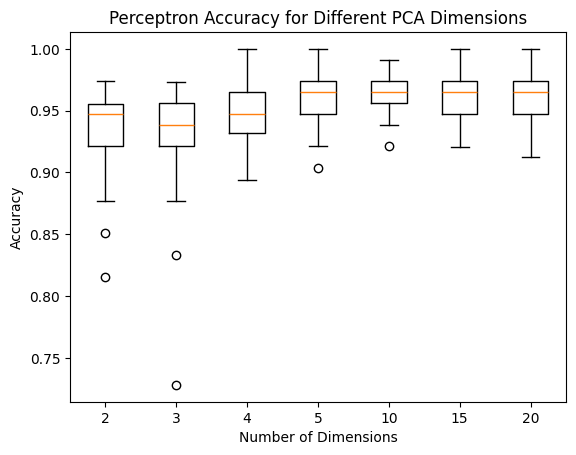

In [14]:
dimensions = [2, 3, 4, 5, 10, 15, 20]

accuracies = []
for dim in dimensions:
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X_normalized)

    perceptron = Perceptron()

    # Define the cross-validation strategy
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

    # Evaluate accuracy using cross-validation
    scores = cross_val_score(perceptron, X_pca, y, cv=cv, scoring='accuracy')
    accuracies.append(scores)

plt.boxplot(accuracies, labels=dimensions)
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.title('Perceptron Accuracy for Different PCA Dimensions')
plt.show()

In [15]:
#print(len(accuracies))
#print(len(accuracies[0]))